# Filtering and trimming messages

In [8]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage
messages = [HumanMessage(f"Hello", name="dummy"), AIMessage(f"So you said you were researching ocean mammals?", name="Bot")]
messages.append(HumanMessage(f"Yes, I know about whales. But what others should I learn about?", name="Lance"))

for m in messages:
    m.pretty_print()

================================ Human Message =================================
Name: dummy

Hello
================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, I know about whales. But what others should I learn about?


AIMessage(content='Here are some other interesting ocean mammals you could learn more about:\n\n- Seals - There are many species of seals, sea lions, and walruses that live in oceans around the world. They are pinnipeds known for their streamlined bodies, flippers, and ability to swim and dive.\n\n- Dolphins - Dolphins are highly intelligent and social marine mammals. There are numerous dolphin species that live in oceans and coastal waters, like bottlenose, spinner, and orca (killer whales) dolphins.\n\n- Manatees - Also known as "sea cows", manatees are large, gentle marine mammals that live in shallow coastal waters, estuaries, and rivers in parts of the Caribbean, Gulf of Mexico, and Florida.\n\n- Sea otters - Sea otters are charismatic marine mammals known for floating on their backs and using tools. They are found along the Pacific coasts of North America and Asia.\n\n- Polar bears - While they are not strictly marine mammals, polar bears spend a lot of time hunting and foraging 

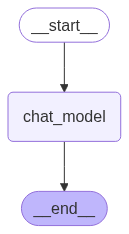

In [10]:
from IPython.display import Image, display
from langgraph.graph import MessagesState
from langgraph.graph import StateGraph, START, END

# Node
def chat_model_node(state: MessagesState):
    return {"messages": llm.invoke(state["messages"])}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [11]:
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================ Human Message =================================
Name: dummy

Hello
================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

Here are some other interesting ocean mammals you could learn more about:

- Seals and Sea Lions - There are many different species of seals and sea lions found in oceans around the world. They are known for their ability to swim and their flipper-like limbs.

- Otters - Sea otters in particular are fascinating ocean mammals. They are known for holding hands while napping to avoid drifting apart, and using rocks to crack open shellfish.

- Manatees - Also known as "sea cows", manatees are large, gentle herbivores t

### Reducer
A practical challenge when working with messages is managing long-running conversations.


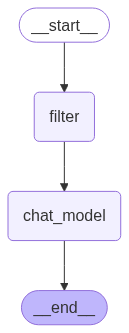

In [20]:
from langchain_core.messages import RemoveMessage

# Nodes
def filter_messages(state: MessagesState):
    # Delete all but the 3 most recent messages
    delete_messages = [RemoveMessage(id=m.id) for m in state["messages"][:-1]]
    print(f"Deleting: {delete_messages}")
    return {"messages": delete_messages}

def chat_model_node(state: MessagesState):    
    return {"messages": [llm.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("filter", filter_messages)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "filter")
builder.add_edge("filter", "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [21]:
# Message list with a preamble
messages = [HumanMessage("Hello", name="dummy", id="0"), AIMessage("Hi.", name="Bot", id="1")]
messages.append(HumanMessage("Hi.", name="Lance", id="2"))
messages.append(AIMessage("So you said you were researching ocean mammals?", name="Bot", id="3"))
messages.append(HumanMessage("Yes, I know about whales. But what others should I learn about?", name="Lance", id="4"))

# Invoke
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

Deleting: [RemoveMessage(content='', additional_kwargs={}, response_metadata={}, id='0'), RemoveMessage(content='', additional_kwargs={}, response_metadata={}, id='1'), RemoveMessage(content='', additional_kwargs={}, response_metadata={}, id='2'), RemoveMessage(content='', additional_kwargs={}, response_metadata={}, id='3')]
================================ Human Message =================================
Name: Lance

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

Here are some other fascinating animals you could learn more about:

1. Octopus - Highly intelligent marine creatures with unique traits like changing color, using tools, and having three hearts.

2. Platypus - The unique egg-laying, duck-billed, beaver-tailed, otter-footed mammal found only in Australia.

3. Mantis Shrimp - One of the most fascinating and violent creatures in the ocean, with incredible vision and lightning fast 

### Filtering messages
If you don't need or want to modify the graph state, you can just filter the messages you pass to the chat model.

For example, just pass in a filtered list: llm.invoke(messages[-1:]) to the model.

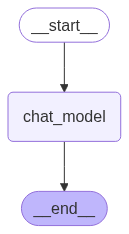

In [22]:
# Node
def chat_model_node(state: MessagesState):
    return {"messages": [llm.invoke(state["messages"][-1:])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [25]:
messages.append(output['messages'][-1])
messages.append(HumanMessage(f"Tell me more about Narwhals!", name="Lance"))

In [26]:
for m in messages:
    m.pretty_print()

================================ Human Message =================================
Name: dummy

Hello
================================== Ai Message ==================================
Name: Bot

Hi.
================================ Human Message =================================
Name: Lance

Hi.
================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

Here are some other fascinating animals you could learn more about:

1. Octopus - Highly intelligent marine creatures with unique traits like changing color, using tools, and having three hearts.

2. Platypus - The unique egg-laying, duck-billed, beaver-tailed, otter-footed mammal found only in Australia.

3. Mantis Shrimp -

In [27]:
# Invoke, using message filtering
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================ Human Message =================================
Name: dummy

Hello
================================== Ai Message ==================================
Name: Bot

Hi.
================================ Human Message =================================
Name: Lance

Hi.
================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

Here are some other fascinating animals you could learn more about:

1. Octopus - Highly intelligent marine creatures with unique traits like changing color, using tools, and having three hearts.

2. Platypus - The unique egg-laying, duck-billed, beaver-tailed, otter-footed mammal found only in Australia.

3. Mantis Shrimp -

The state has all of the mesages.

But, the model invocation only uses the last message:

### Trim messages
Another approach is to trim messages, based upon a set number of tokens.

This restricts the message history to a specified number of tokens.

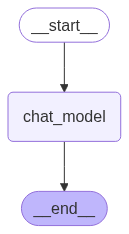

In [37]:
from langchain_core.messages import trim_messages

# Node
def chat_model_node(state: MessagesState):
    messages = trim_messages(
            state["messages"],
            max_tokens=100,
            strategy="last",
            token_counter=ChatOpenAI(model="gpt-4o"),
            allow_partial=False,
        )
    return {"messages": [llm.invoke(messages)]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [38]:
messages.append(output['messages'][-1])
messages.append(HumanMessage(f"Tell me where Orcas live!", name="Lance"))

In [ ]:
# Example of trimming messages
#  Since it is using openai I was not able to run but it only keeps the last message 
# [HumanMessage(content='Tell me where Orcas live!', name='Lance')]
trim_messages(
            messages,
            max_tokens=100,
            strategy="last",
            token_counter=ChatOpenAI(model="gpt-4o"),
            allow_partial=False
        )

In [ ]:
# Invoke, using message trimming in the chat_model_node 
messages_out_trim = graph.invoke({'messages': messages})